In [2]:
cd ~/bench

/home/soda/rcappuzz/work/benchmark-join-suggestions


In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from joblib import load
from pathlib import Path
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import polars as pl
from src.utils.joining import execute_join_with_aggregation
import polars as pl
import numpy as np
import datetime
from src.utils.constants import LABEL_MAPPING
import src.utils.plotting as plotting
from src.utils.logging import read_logs

In [5]:
sns.set_context("talk")
plt.style.use("seaborn-v0_8-talk")

In [6]:
DEFAULT_QUERY_RESULT_DIR = Path("results/query_results")

# Studying query timings

In [7]:
def load_query_result(yadl_version, index_name, tab_name, query_column, top_k):
    query_result_path = "{}__{}__{}__{}.pickle".format(
        yadl_version,
        index_name,
        tab_name,
        query_column,
    )

    with open(Path(DEFAULT_QUERY_RESULT_DIR, query_result_path), "rb") as fp:
        query_result = pickle.load(fp)

    query_result.select_top_k(top_k)
    return query_result

In [7]:
df_query = pl.read_csv("results/query_logging.txt")
df_index = pl.read_csv("results/index_logging.txt")
df_query.with_columns(
    pl.when(pl.col("index_name") == "exact_matching")
    .then(pl.lit("exact"))
    .otherwise(pl.lit("minhash"))
)
df_minhash = df_index.filter(pl.col("index_name") == "minhash").join(
    df_query, on=["data_lake_version", "index_name"]
)

In [10]:
df_minhash

data_lake_version,index_name,base_table,query_column,step,time_creation,time_save,time_load,time_query,base_table_right,query_column_right,step_right,time_create,time_save_right,time_load_right,time_query_right
str,str,str,str,str,f64,f64,i64,i64,str,str,str,i64,i64,f64,f64
"""wordnet_full""","""minhash""",null,null,"""create""",2777.567594,144.590746,0,0,"""us_elections-y…","""col_to_embed""","""query""",0,0,64.179235,0.219568
"""wordnet_full""","""minhash""",null,null,"""create""",2777.567594,144.590746,0,0,"""housing_prices…","""col_to_embed""","""query""",0,0,64.179235,0.90051
"""wordnet_full""","""minhash""",null,null,"""create""",2777.567594,144.590746,0,0,"""company_employ…","""col_to_embed""","""query""",0,0,64.179235,1.12316
"""wordnet_full""","""minhash""",null,null,"""create""",2777.567594,144.590746,0,0,"""movies-yadl-de…","""col_to_embed""","""query""",0,0,64.179235,2.067074
"""wordnet_full""","""minhash""",null,null,"""create""",2777.567594,144.590746,0,0,"""us_accidents-y…","""col_to_embed""","""query""",0,0,64.179235,2.553633
"""wordnet_full""","""minhash""",null,null,"""create""",2777.567594,144.590746,0,0,"""movies_vote-ya…","""col_to_embed""","""query""",0,0,64.179235,2.722645
"""wordnet_full""","""minhash""",null,null,"""create""",2777.567594,144.590746,0,0,"""us_county_popu…","""col_to_embed""","""query""",0,0,64.179235,2.912615
"""binary_update""","""minhash""",null,null,"""create""",58.176347,0.93817,0,0,"""us_elections-y…","""col_to_embed""","""query""",0,0,0.998875,0.107492
"""binary_update""","""minhash""",null,null,"""create""",58.176347,0.93817,0,0,"""housing_prices…","""col_to_embed""","""query""",0,0,0.998875,0.609804


In [11]:
df_timings = df_query.join(
    df_index, on=["data_lake_version", "index_name", "base_table", "query_column"]
)

In [12]:
df_ = df_timings.drop(
    [
        "time_create",
        "time_save",
        "step_right",
        "step",
        "time_load_right",
        "time_query_right",
    ]
)
df_ = df_.with_columns(pl.col("time_creation") + pl.col("time_query"))

In [14]:
df_index.group_by(pl.col("data_lake_version", "index_name")).agg(
    pl.mean("time_creation"),
    pl.mean("time_save"),
).sort("data_lake_version", "index_name")

data_lake_version,index_name,time_creation,time_save
str,str,f64,f64
"""binary_update""","""exact_matching…",13.327526,0.007439
"""binary_update""","""minhash""",58.176347,0.93817
"""open_data_us""","""exact_matching…",482.499397,0.119695
"""wordnet_full""","""exact_matching…",714.259835,0.11657
"""wordnet_full""","""minhash""",2777.567594,144.590746


In [15]:
df_query.group_by(pl.col("data_lake_version", "index_name")).agg(
    pl.mean("time_load"),
    pl.mean("time_query"),
).sort("data_lake_version", "index_name")

data_lake_version,index_name,time_load,time_query
str,str,f64,f64
"""binary_update""","""exact_matching…",0.072179,0.018886
"""binary_update""","""minhash""",0.998875,0.793448
"""binary_update""","""minhash_hybrid…",0.764927,10.191954
"""open_data_us""","""exact_matching…",0.039641,0.030407
"""open_data_us""","""minhash""",82.113701,1.117913
"""open_data_us""","""minhash_hybrid…",82.434337,69.34294
"""wordnet_full""","""exact_matching…",0.031932,0.032721
"""wordnet_full""","""minhash""",64.179235,1.785601
"""wordnet_full""","""minhash_hybrid…",61.067215,430.777966


# Studying the query results on their own

Results are prepared with the script `analysis_query_results.py`.


In [17]:
df = pl.read_csv("analysis_query_results.csv")

In [18]:
df.head()

retrieval_method,data_lake_version,table_name,query_column,aggregation,top_k,rank,cnd_table,cnd_column,containment,src_nrows,src_ncols,cnd_nrows,cnd_ncols,join_time
str,str,str,str,str,i64,i64,str,str,f64,i64,i64,i64,i64,f64
"""exact_matching…","""wordnet_full""","""company_employ…","""col_to_embed""","""first""",30,0,"""20d3c463551bdf…","""wordnet_compan…",0.778519,3109,2,72866,19,0.019849
"""exact_matching…","""wordnet_full""","""company_employ…","""col_to_embed""","""first""",30,1,"""bb07025128e446…","""wordnet_compan…",0.761508,3109,2,60066,3,0.014955
"""exact_matching…","""wordnet_full""","""company_employ…","""col_to_embed""","""first""",30,2,"""6aa1967be2d074…","""wordnet_compan…",0.749166,3109,2,68877,3,0.014295
"""exact_matching…","""wordnet_full""","""company_employ…","""col_to_embed""","""first""",30,3,"""3d1c4969f30b40…","""wordnet_compan…",0.749166,3109,2,60677,3,0.013742
"""exact_matching…","""wordnet_full""","""company_employ…","""col_to_embed""","""first""",30,4,"""5643654a04617e…","""wordnet_compan…",0.713809,3109,2,56891,3,0.012783


In [19]:
df = df.with_columns(
    (pl.col("cnd_nrows") * pl.col("containment")).alias("matched_rows")
)

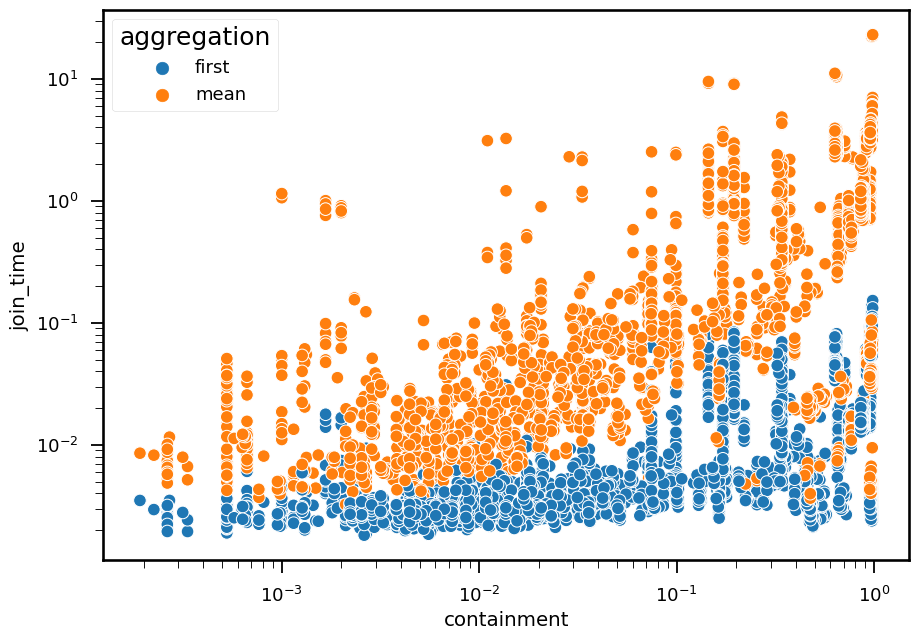

In [45]:
ax = sns.scatterplot(
    data=df.filter(pl.col("top_k") == 200).to_pandas(),
    x="containment",
    y="join_time",
    hue="aggregation",
)
ax.set_yscale("log")
ax.set_xscale("log")

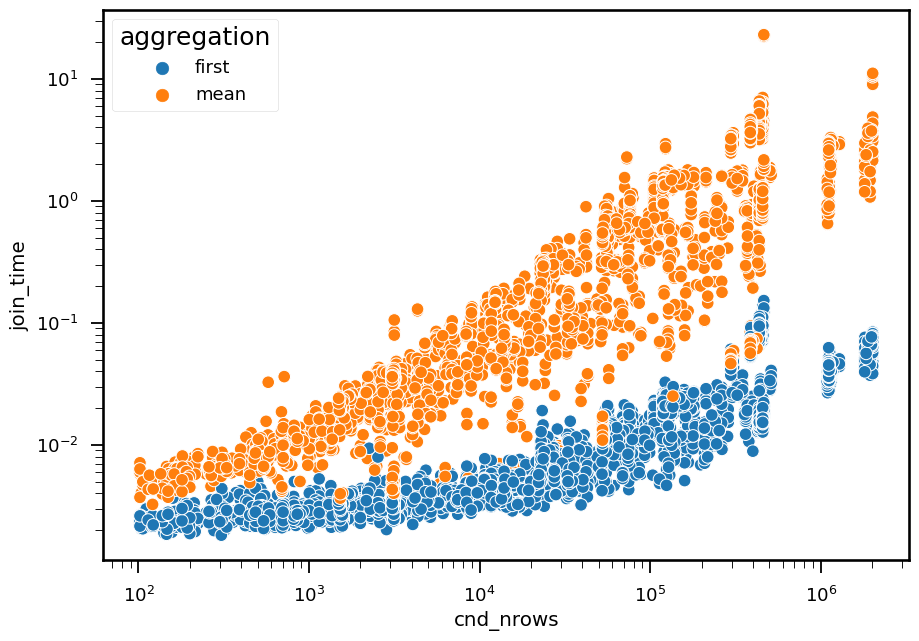

In [46]:
ax = sns.scatterplot(
    data=df.filter(pl.col("top_k") == 200).to_pandas(),
    x="cnd_nrows",
    y="join_time",
    hue="aggregation",
)
ax.set_yscale("log")
ax.set_xscale("log")

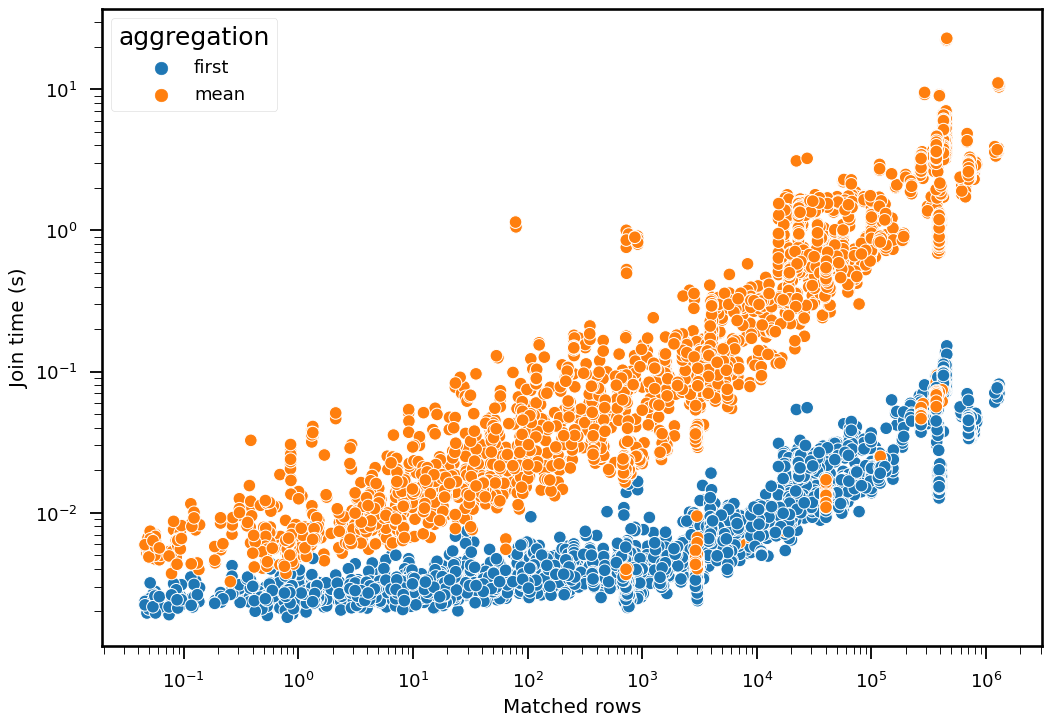

In [47]:
x_axis_var = "matched_rows"
fig, ax = plt.subplots(squeeze=True, layout="constrained")
sns.scatterplot(
    data=df.filter(pl.col("top_k") == 200).to_pandas(),
    x=x_axis_var,
    y="join_time",
    hue="aggregation",
    ax=ax,
)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Matched rows")
ax.set_ylabel("Join time (s)")
fig.savefig(f"images/join_time-{x_axis_var}.pdf")

In [48]:
LABEL_MAPPING["jd_method"]

{'exact_matching': 'Exact',
 'minhash': 'MinHash',
 'minhash_hybrid': 'Hybrid MinHash'}

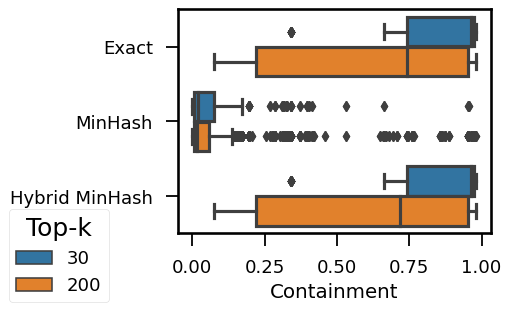

In [49]:
fig, ax = plt.subplots(squeeze=True, figsize=(5, 3), layout="constrained")
sns.boxplot(
    data=df.to_pandas(), x="containment", y="retrieval_method", hue="top_k", ax=ax
)
ax.get_legend().remove()
fig.legend(loc="lower left", title="Top-k")
ax.set_yticklabels(
    [LABEL_MAPPING["jd_method"][x.get_text()] for x in ax.get_yticklabels()]
)
ax.set_xlabel("Containment")
ax.set_ylabel("")
fig.savefig("images/containment-topk.pdf")
fig.savefig("images/containment-topk.png")

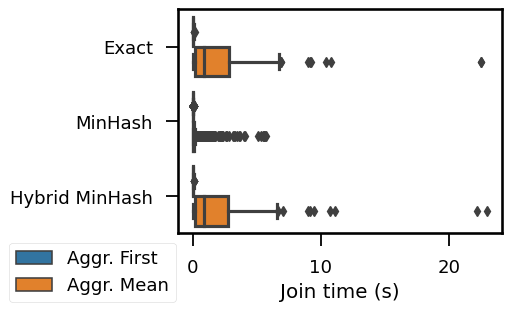

In [50]:
fig, ax = plt.subplots(squeeze=True, figsize=(5, 3), layout="constrained")
sns.boxplot(
    data=df.filter(pl.col("top_k") == 200).to_pandas(),
    x="join_time",
    y="retrieval_method",
    hue="aggregation",
    ax=ax,
)
h, l = ax.get_legend_handles_labels()
mp = {
    "first": "Aggr. First",
    "mean": "Aggr. Mean",
}
l = [mp[_] for _ in l]
ax.get_legend().remove()
fig.legend(h, l, loc="lower left")
ax.set_yticklabels(
    [LABEL_MAPPING["jd_method"][x.get_text()] for x in ax.get_yticklabels()]
)
ax.set_xlabel("Join time (s)")
ax.set_ylabel("")
fig.savefig("images/join_time-topk.pdf")
fig.savefig("images/join_time-topk.png")

In [51]:
df_agg = (
    df.group_by(
        [
            "retrieval_method",
            "data_lake_version",
            "table_name",
            "query_column",
            "aggregation",
            "top_k",
        ]
    )
    .agg(
        pl.col("containment").mean().alias("avg_containment"),
        pl.col("containment").median().alias("median_containment"),
        pl.col("cnd_nrows").mean().alias("avg_cnd_nrows"),
        pl.col("cnd_nrows").median().alias("median_cnd_nrows"),
        pl.col("join_time").mean().alias("avg_join_time"),
        pl.col("join_time").median().alias("median_join_time"),
    )
    .sort("retrieval_method", "table_name")
)

In [52]:
df.write_csv("results_indexing_time_cont.csv")

In [53]:
ddf = df_agg.melt(
    id_vars=["retrieval_method", "aggregation", "top_k"],
    value_vars=["median_containment", "avg_join_time"],
)

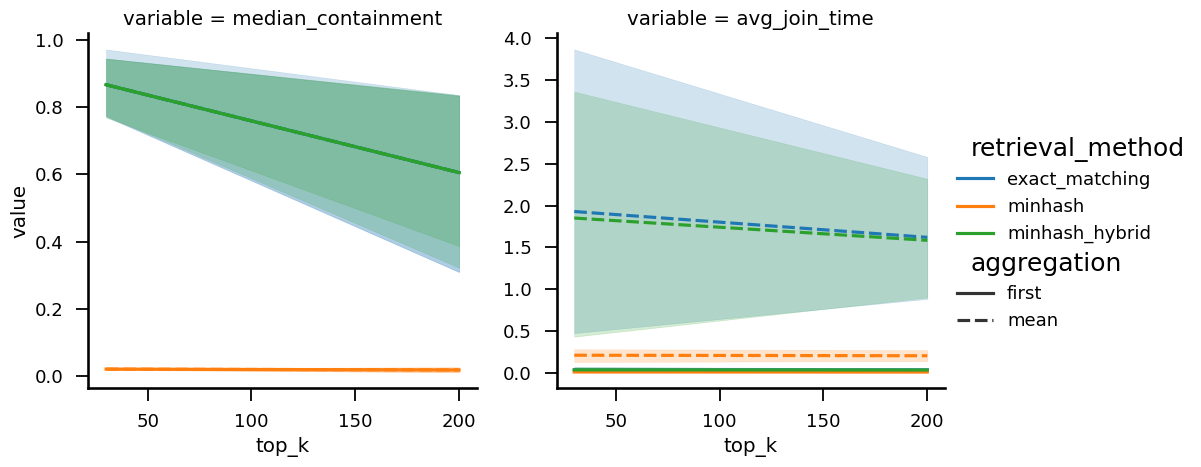

In [54]:
sns.relplot(
    data=ddf,
    x="top_k",
    y="value",
    hue="retrieval_method",
    col="variable",
    kind="line",
    facet_kws={"sharey": False},
    style="aggregation",
)

# Joining the query results with the general results

In [31]:
# exp_name = "0360-jinwugcl"
exp_path = "results/logs/0363-mp1a3by4"
df_raw = read_logs(exp_name=None, exp_path=exp_path)
df_raw = df_raw.filter(pl.col("estimator") != "nojoin")

In [33]:
df_agg = (
    df.filter(pl.col("top_k") == 200)
    .group_by(
        [
            "retrieval_method",
            "data_lake_version",
            "table_name",
            "query_column",
            "aggregation",
        ]
    )
    .agg(
        pl.col("containment").mean().alias("avg_containment"),
        pl.col("containment").median().alias("median_containment"),
        pl.col("containment").top_k(30).mean().alias("top_30_avg_containment"),
        pl.col("containment").top_k(30).median().alias("top_30_median_containment"),
        pl.col("cnd_nrows").mean().alias("avg_cnd_nrows"),
        pl.col("cnd_nrows").median().alias("median_cnd_nrows"),
        pl.col("join_time").mean().alias("avg_join_time"),
        pl.col("join_time").median().alias("median_join_time"),
        pl.col("matched_rows").mean().alias("avg_matched_rows"),
        pl.col("matched_rows").median().alias("median_matched_rows"),
    )
    .sort("retrieval_method", "table_name")
)

In [34]:
res = df_raw.join(
    df_agg,
    left_on=["target_dl", "jd_method", "base_table", "query_column"],
    right_on=["data_lake_version", "retrieval_method", "table_name", "query_column"],
)

In [35]:
f = {"jd_method": "exact_matching", "chosen_model": "catboost"}

In [1]:
from sklearn.linear_model import LinearRegression

r = res.filter(**f)
X = r.select("avg_containment").to_numpy()
y = r["r2score"].to_numpy()

model = LinearRegression()
model.fit(X, y)
fig, ax = plt.subplots(squeeze=True)
ax.scatter(
    X + plotting.prepare_jitter(X.shape, offset_value=0, factor=0.0),
    y,
    alpha=0.7,
    edgecolors="k",
    linewidths=0.5,
)
ax.plot(X, model.predict(X), color="k")
ax.set_ylabel("R2 score")
ax.set_xlabel("Containment")

NameError: name 'res' is not defined

[Text(0, 0, '(D) US Elections'),
 Text(0, 1, '(D) Housing Prices'),
 Text(0, 2, '(D) Employees'),
 Text(0, 3, '(D) Movies'),
 Text(0, 4, '(D) Movies Vote'),
 Text(0, 5, '(D) US Accidents'),
 Text(0, 6, '(D) US County Population')]

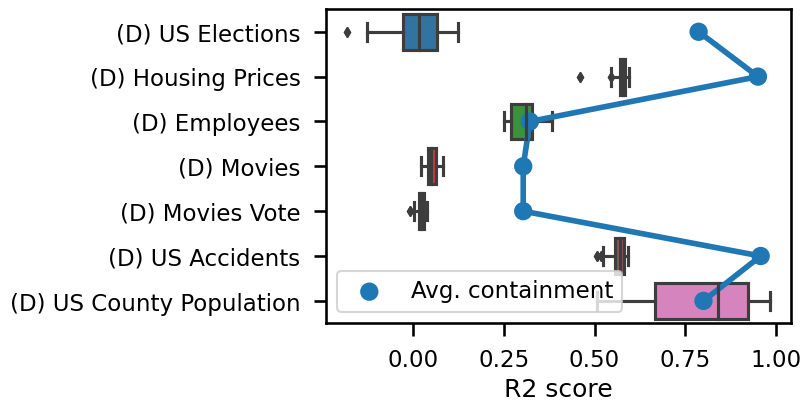

In [38]:
fig, ax = plt.subplots(figsize=(8, 4), layout="constrained")
_d = res.filter(**f).select(["base_table", "r2score"]).melt(id_vars=["base_table"])
sns.boxplot(data=_d.to_pandas(), y="base_table", x="value", ax=ax)
_d = (
    res.filter(**f)
    .select(["base_table", "avg_containment"])
    .melt(id_vars=["base_table"])
)
# ax2 = ax.twiny()
sns.pointplot(
    data=_d.to_pandas(), y="base_table", x="value", ax=ax, label="Avg. containment"
)
ax.legend(loc="lower left")
ax.set_xlabel("R2 score")
ax.set_ylabel(None)
ax.set_yticklabels(
    [LABEL_MAPPING["base_table"][x.get_text()] for x in ax.get_yticklabels()]
)

[Text(0, 0, '(D) US Elections'),
 Text(0, 1, '(D) Housing Prices'),
 Text(0, 2, '(D) Employees'),
 Text(0, 3, '(D) Movies'),
 Text(0, 4, '(D) Movies Vote'),
 Text(0, 5, '(D) US Accidents'),
 Text(0, 6, '(D) US County Population')]

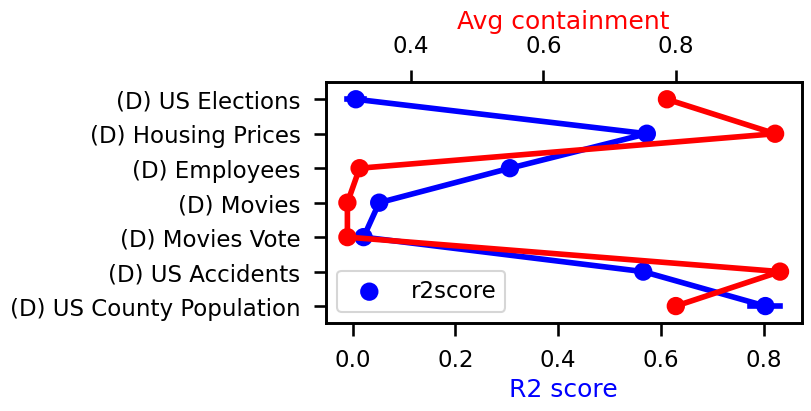

In [39]:
fig, ax = plt.subplots(figsize=(8, 4), layout="constrained")
_d = res.filter(**f).select(["base_table", "r2score"]).melt(id_vars=["base_table"])
sns.pointplot(
    data=_d.to_pandas(), y="base_table", x="value", ax=ax, label="r2score", color="blue"
)
_d = (
    res.filter(**f)
    .select(["base_table", "avg_containment"])
    .melt(id_vars=["base_table"])
)
ax2 = ax.twiny()
sns.pointplot(
    data=_d.to_pandas(),
    y="base_table",
    x="value",
    ax=ax2,
    label="Avg. containment",
    color="red",
)
ax.legend(loc="lower left")
ax.set_xlabel("R2 score", color="blue")
ax2.set_xlabel("Avg containment", color="red")
ax.set_ylabel(None)
ax.set_yticklabels(
    [LABEL_MAPPING["base_table"][x.get_text()] for x in ax.get_yticklabels()]
)

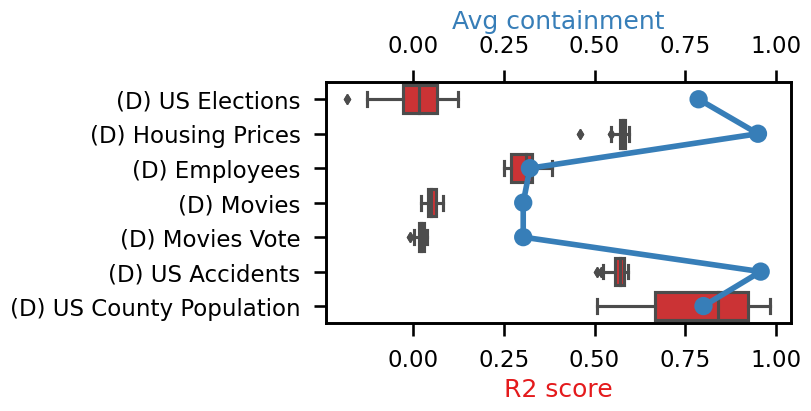

In [40]:
cmap = mpl.colormaps["Set1"](range(2))
fig, ax = plt.subplots(figsize=(8, 4), layout="constrained")
_d = res.filter(**f).select(["base_table", "r2score"]).melt(id_vars=["base_table"])
sns.boxplot(data=_d.to_pandas(), y="base_table", x="value", ax=ax, color=cmap[0])
_d = (
    res.filter(**f)
    .select(["base_table", "avg_containment"])
    .melt(id_vars=["base_table"])
)
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
sns.pointplot(
    data=_d.to_pandas(),
    y="base_table",
    x="value",
    ax=ax2,
    label="Avg. containment",
    color=cmap[1],
)
# ax.legend(loc="lower left")
ax.set_xlabel("R2 score", color=cmap[0])
# ax2.legend(loc="lower left")
ax2.set_xlabel("Avg containment", color=cmap[1])
ax.set_ylabel(None)
ax.set_yticklabels(
    [LABEL_MAPPING["base_table"][x.get_text()] for x in ax.get_yticklabels()]
)
fig.savefig("images/r2score_containment_boxplot.pdf")
fig.savefig("images/r2score_containment_boxplot.png")

# Analyzing the aggregation results

In [16]:
paths = [
    "analysis_query_results_binary_update_group_stats_all.csv",
    "analysis_query_results_open_data_us_group_stats_all.csv",
    "analysis_query_results_wordnet_full_group_stats_all.csv",
]
list_df = []
for path in paths:
    list_df.append(pl.read_csv(path))

df = pl.concat(list_df)

In [42]:
from src.utils.constants import LABEL_MAPPING

In [55]:
_d = df.melt(
    id_vars=["data_lake_version", "table_name", "cand_hash", "col_name"],
    value_vars=["in_mode", "equal_aggr"],
).with_columns(pl.col("table_name").replace(LABEL_MAPPING["base_table"]), 
               pl.col("data_lake_version").replace(LABEL_MAPPING["target_dl"]),
               pl.col("variable").replace({"in_mode": "In Mode", "equal_aggr": "Equal aggr."})
               )


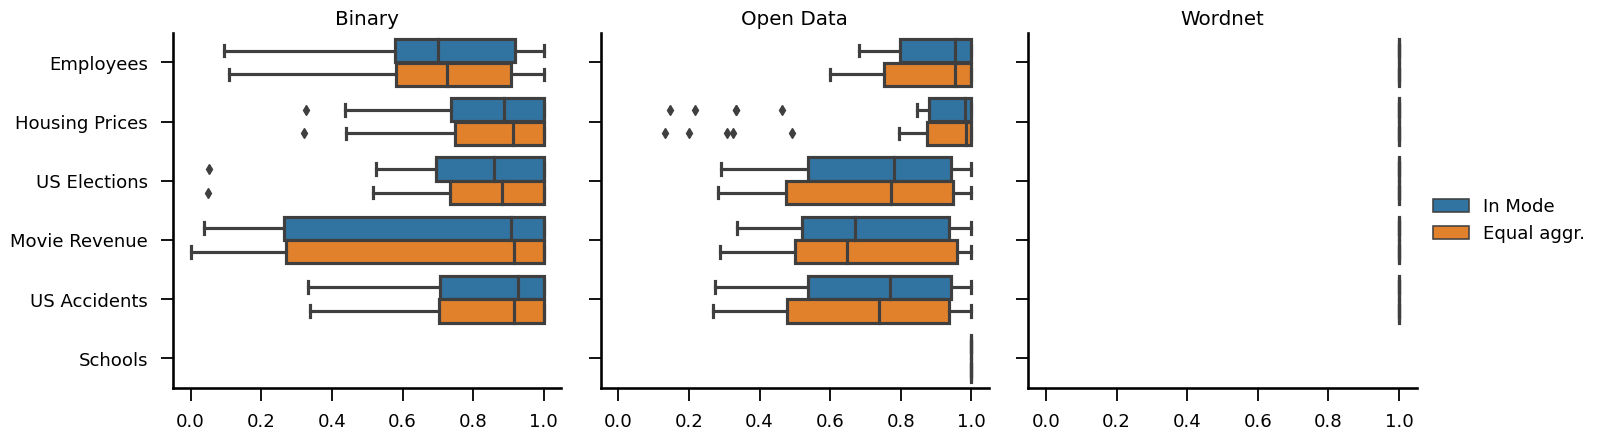

In [57]:
g = sns.catplot(
    data=_d.to_pandas(),
    x="value",
    y="table_name",
    col="data_lake_version",
    hue="variable",
    kind="box",
    legend=False
)
g.set_axis_labels("", "")
g.set_titles("{col_name}")
g.add_legend(title="")
g.savefig("images/aggregation_analysis.pdf")
g.savefig("images/aggregation_analysis.png")


In [65]:
df.with_columns(pl.col("table_name").replace(LABEL_MAPPING["base_table"]), 
               pl.col("data_lake_version").replace(LABEL_MAPPING["target_dl"]),
               ).to_pandas().pivot_table(index=["table_name"], values=["in_mode", "equal_aggr","nulls", "unique", "grp_size"], columns=["data_lake_version"], aggfunc="mean")

equal_aggr                      grp_size                     \
data_lake_version     Binary Open Data Wordnet      Binary  Open Data Wordnet   
table_name                                                                      
Employees           0.706701  0.890363     1.0   25.508631   4.310795     1.0   
Housing Prices      0.830963  0.888647     1.0    3.145948   8.027880     1.0   
Movie Revenue       0.698365  0.691401     1.0  174.054282  30.937517     1.0   
Schools                  NaN  1.000000     NaN         NaN   1.000000     NaN   
US Accidents        0.796318  0.679634     1.0    3.945878  37.749256     1.0   
US Elections        0.819461  0.696229     1.0    5.286911  33.099883     1.0   

                    in_mode                    nulls                      \
data_lake_version    Binary Open Data Wordnet Binary Open Data   Wordnet   
table_name                                                                 
Employees          0.710932  0.896482     1.0    0.0  0.640650  0.566176   
Housing Prices     0.810388  0.892421     1.0    0.0  2.424586  0.758686   
Movie Revenue      0.700907  0.699777     1.0    0.0  7.409781  0.532543   
Schools                 NaN  1.000000     NaN    NaN  0.045207       NaN   
US Accidents       0.800900  0.707795     1.0    0.0  7.297266  0.752632   
US Elections       0.803690  0.712681     1.0    0.0  6.320366  0.864125   

                       unique                     
data_lake_version      Binary  Open Data Wordnet  
table_name                                        
Employees           25.508631   2.666320     1.0  
Housing Prices       3.145948   1.861996     1.0  
Movie Revenue      174.054282   9.835405     1.0  
Schools                   NaN   1.000000     NaN  
US Accidents         3.945878  10.016106     1.0  
US Elections         5.286911   8.915949     1.0